In [1]:
import os
import sys
sys.path.append('../GansFallingShort')
from real_data_experiments.metrics import Bleu, SelfBleu
from time import time
import numpy as np

In [2]:
num_references = 2000

In [3]:
real_data_coco = 'data/testdata/processed_image_coco.txt'
real_data_emnlp = 'data/testdata/emnlp_news.txt'
def get_bleu_scores(test_data, is_self_bleu=False, grams=[2,3,4,5], dataset='coco'):
    result = []
    if dataset == 'coco':
        real_data = real_data_coco
    else:
        real_data = real_data_emnlp
    
    for gram in grams:
        if is_self_bleu:
            bleu = SelfBleu(test_text=test_data, gram=gram, num_sentences=num_references)
        else:    
            bleu = Bleu(test_text=test_data, real_text=real_data, gram=gram, num_real_sentences=num_references)
        result.append(bleu.get_score(is_fast=True))
    return result

In [4]:
save_dir = './save'
f_tmpl = os.path.join(save_dir, "{}_{}/{}_{}_epoch[{}]_pr[{}_{}]_temp[{}].txt")
TEMPERATURES = [0.8, 0.9, 0.95, 1.0, 1.01, 1.02, 1.03, 1.04, 1.06, 1.07, 1.08, 1.09, 2.25, 2.5, 2.75, 3.25, 3.5, 3.75]
TEMPERATURES = TEMPERATURES[1::3] 
PR_RATES = [0.0, 0.25, 0.5, 0.75]
grams = [5]
models = ['tokmangan', 'maskgan']
modes = [('GAN', 200), ('MLE', 80)]
db = 'coco'
eval_dir = '{}_eval'.format(db)
eval_dir = os.path.join(save_dir, eval_dir)
if not os.path.exists(eval_dir):
    os.mkdir(eval_dir)

In [5]:
TEMPERATURES

[0.9, 1.01, 1.04, 1.08, 2.5, 3.5]

In [6]:
for model in models:
    for mode in modes:
        _mode = mode[0]
        _epoch = mode[1]
        bleu = np.zeros((len(PR_RATES), len(TEMPERATURES)))
        sbleu = np.zeros((len(PR_RATES), len(TEMPERATURES)))
        for i, pr_rate in enumerate(PR_RATES):
            for j, temp in enumerate(TEMPERATURES):
                prev = time()
                fpath = f_tmpl.format(db, model, db, _mode, _epoch, pr_rate, pr_rate, temp)
                bleu[i, j] = get_bleu_scores(fpath, grams=grams)[0]
                sbleu[i, j] = get_bleu_scores(fpath, is_self_bleu=True, grams=grams)[0]
                elapsed = (time() - prev)/60
                print("elapsed:{}m".format(int(elapsed)), model, _mode, pr_rate, temp)
        np.savetxt(os.path.join(eval_dir, "{}_{}_bleu.csv".format(model, _mode)), bleu, delimiter=",")
        np.savetxt(os.path.join(eval_dir, "{}_{}_sbleu.csv".format(model, _mode)), sbleu, delimiter=",")

elapsed:2m tokmangan GAN 0.0 0.9
elapsed:2m tokmangan GAN 0.0 1.01
elapsed:2m tokmangan GAN 0.0 1.04
elapsed:2m tokmangan GAN 0.0 1.08
elapsed:2m tokmangan GAN 0.0 2.5
elapsed:2m tokmangan GAN 0.0 3.5
elapsed:2m tokmangan GAN 0.25 0.9
elapsed:2m tokmangan GAN 0.25 1.01
elapsed:2m tokmangan GAN 0.25 1.04
elapsed:2m tokmangan GAN 0.25 1.08
elapsed:2m tokmangan GAN 0.25 2.5
elapsed:2m tokmangan GAN 0.25 3.5
elapsed:2m tokmangan GAN 0.5 0.9
elapsed:2m tokmangan GAN 0.5 1.01
elapsed:2m tokmangan GAN 0.5 1.04
elapsed:2m tokmangan GAN 0.5 1.08
elapsed:2m tokmangan GAN 0.5 2.5
elapsed:2m tokmangan GAN 0.5 3.5
elapsed:2m tokmangan GAN 0.75 0.9
elapsed:2m tokmangan GAN 0.75 1.01
elapsed:2m tokmangan GAN 0.75 1.04
elapsed:2m tokmangan GAN 0.75 1.08
elapsed:2m tokmangan GAN 0.75 2.5
elapsed:2m tokmangan GAN 0.75 3.5
elapsed:2m tokmangan MLE 0.0 0.9
elapsed:2m tokmangan MLE 0.0 1.01
elapsed:2m tokmangan MLE 0.0 1.04
elapsed:2m tokmangan MLE 0.0 1.08
elapsed:2m tokmangan MLE 0.0 2.5
elapsed:2m tokma

In [7]:
# train data
fpath = 'data/image_coco.txt'
print(get_bleu_scores(fpath, grams=grams))
print(get_bleu_scores(fpath, is_self_bleu=True, grams=grams))

[0.12656700966330794]
[0.23448268905106498]


In [8]:
# test data
fpath = 'data/testdata/processed_image_coco.txt'
print(get_bleu_scores(fpath, grams=grams))
print(get_bleu_scores(fpath, is_self_bleu=True, grams=grams))

[0.39011678058562826]
[0.29134622493796997]


# coco eval

In [33]:
# codes are borrowed from https://github.com/pclucas14/GansFallingShort
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(font_scale=1.9)  # Make sure everything is readable.
sns.set_style("whitegrid")

In [34]:
TEMPERATURES = [0.8, 0.9, 0.95, 1.0, 1.01, 1.02, 1.03, 1.04, 1.06, 1.07, 1.08, 1.09, 2.25, 2.5, 2.75, 3.25, 3.5, 3.75]
TEMPERATURES = TEMPERATURES[1::3]
PR_RATES = [0.0,0.25,0.5,0.75]

In [35]:
TEMPERATURES

[0.9, 1.01, 1.04, 1.08, 2.5, 3.5]

In [61]:
figsize=(6,4)

In [36]:
maskgan_x = -np.genfromtxt('save/coco_eval/maskgan_GAN_bleu.csv', delimiter=',')
maskgan_y = np.genfromtxt('save/coco_eval/maskgan_GAN_sbleu.csv', delimiter=',')
maskmle_x = -np.genfromtxt('save/coco_eval/maskgan_MLE_bleu.csv', delimiter=',')
maskmle_y = np.genfromtxt('save/coco_eval/maskgan_MLE_sbleu.csv', delimiter=',')
tokmangan_x = -np.genfromtxt('save/coco_eval/tokmangan_GAN_bleu.csv', delimiter=',')
tokmangan_y = np.genfromtxt('save/coco_eval/tokmangan_GAN_sbleu.csv', delimiter=',')
tokmanmle_x = -np.genfromtxt('save/coco_eval/tokmangan_MLE_bleu.csv', delimiter=',')
tokmanmle_y = np.genfromtxt('save/coco_eval/tokmangan_MLE_sbleu.csv', delimiter=',')
train = [-0.12656700966330794, 0.23448268905106498]
test = [-0.39011678058562826, 0.29134622493796997]

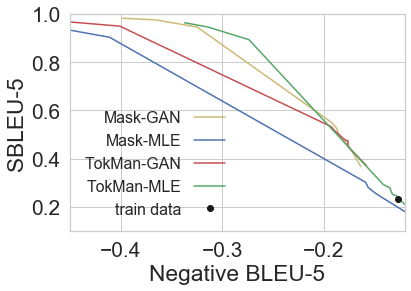

In [62]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
idx = 0

# plt.title('Mask Rate: {}'.format(1-PR_RATES[idx]))
ax.plot(maskgan_x[idx], maskgan_y[idx], 'y', alpha=1.0, label='Mask-GAN')
ax.plot(maskmle_x[idx], maskmle_y[idx], 'b', alpha=1.0, label='Mask-MLE')
ax.plot(tokmangan_x[idx], tokmangan_y[idx], 'r', alpha=1.0, label='TokMan-GAN')
ax.plot(tokmanmle_x[idx], tokmanmle_y[idx], 'g', alpha=1.0, label='TokMan-MLE')
ax.plot(train[0],train[1], 'o',color='k', label='train data')
ax.set_xlabel('Negative BLEU-5')
ax.set_ylabel('SBLEU-5')

plt.axis([-0.45, -0.12, 0.1, 1.0])
plt.legend(markerfirst=False, frameon=False, fontsize='x-small')
plt.show()

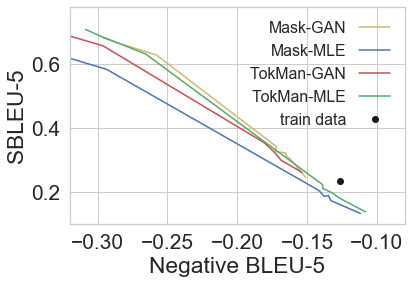

In [63]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
idx = 1

# plt.title('Mask Rate: {}'.format(1-PR_RATES[idx]))
ax.plot(maskgan_x[idx], maskgan_y[idx], 'y', alpha=1.0, label='Mask-GAN')
ax.plot(maskmle_x[idx], maskmle_y[idx], 'b', alpha=1.0, label='Mask-MLE')
ax.plot(tokmangan_x[idx], tokmangan_y[idx], 'r', alpha=1.0, label='TokMan-GAN')
ax.plot(tokmanmle_x[idx], tokmanmle_y[idx], 'g', alpha=1.0, label='TokMan-MLE')

ax.plot(train[0],train[1], 'o', color='k', label='train data')
ax.set_xlabel('Negative BLEU-5')
ax.set_ylabel('SBLEU-5')

plt.axis([-0.32, -0.08, 0.1, 0.78])
plt.legend(markerfirst=False, frameon=False, fontsize='x-small')
plt.show()

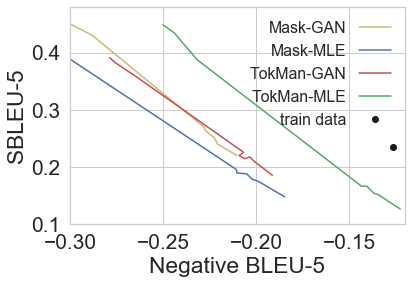

In [64]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
idx = 2

# plt.title('Mask Rate: {}'.format(1-PR_RATES[idx]))
ax.plot(maskgan_x[idx], maskgan_y[idx], 'y', alpha=1.0, label='Mask-GAN')
ax.plot(maskmle_x[idx], maskmle_y[idx], 'b', alpha=1.0, label='Mask-MLE')
ax.plot(tokmangan_x[idx], tokmangan_y[idx], 'r', alpha=1.0, label='TokMan-GAN')
ax.plot(tokmanmle_x[idx], tokmanmle_y[idx], 'g', alpha=1.0, label='TokMan-MLE')

ax.plot(train[0],train[1], 'o',color='k', label='train data')
ax.set_xlabel('Negative BLEU-5')
ax.set_ylabel('SBLEU-5')

plt.axis([-0.3, -0.12, 0.1, 0.48])
plt.legend(markerfirst=False, frameon=False, fontsize='x-small')
plt.show()

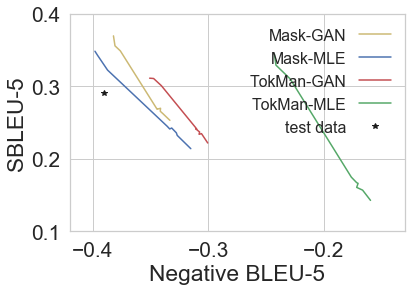

In [65]:
size=15
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
idx = 3

# plt.title('Mask Rate: {}'.format(1-PR_RATES[idx]))
ax.plot(maskgan_x[idx], maskgan_y[idx], 'y', alpha=1.0, label='Mask-GAN')
ax.plot(maskmle_x[idx], maskmle_y[idx], 'b', alpha=1.0, label='Mask-MLE')
ax.plot(tokmangan_x[idx], tokmangan_y[idx], 'r', alpha=1.0, label='TokMan-GAN')
ax.plot(tokmanmle_x[idx], tokmanmle_y[idx], 'g', alpha=1.0, label='TokMan-MLE')

# ax.plot(train[0], train[1], 'o', color='k', label='train data')
ax.plot(test[0], test[1], '*', color='k', label='test data')
ax.set_xlabel('Negative BLEU-5')
ax.set_ylabel('SBLEU-5')

plt.axis([-0.42, -0.13, 0.1, 0.4])
plt.legend(markerfirst=False, frameon=False, fontsize='x-small')
plt.show()

# coco LM score

In [44]:
from train import get_helper, get_batch_seq_len
import tensorflow as tf
import os

save_dir = './save'
f_tmpl = os.path.join(save_dir, "{}_{}/{}_{}_epoch[{}]_pr[{}_{}]_temp[{}].txt")
TEMPERATURES = [0.8, 0.9, 0.95, 1.0, 1.01, 1.02, 1.03, 1.04, 1.06, 1.07, 1.08, 1.09, 2.25, 2.5, 2.75, 3.25, 3.5, 3.75]
PR_RATES = [0.0, 0.25, 0.5, 0.75]
models = ['tokmangan', 'maskgan']
modes = [('GAN', 200), ('MLE', 80)]
db = 'coco'
eval_dir = '{}_eval'.format(db)
eval_dir = os.path.join(save_dir, eval_dir)
if not os.path.exists(eval_dir):
    os.mkdir(eval_dir)

In [45]:
tf.reset_default_graph()
helper =  get_helper('coco', 'lm')
h_dim = 32
helper.emb_dim = h_dim
helper.hidden_dim = h_dim

helper.is_training = False
helper.init()
helper.build()
epoch = helper.load(helper.log_dir_MLE)

def get_lm_score(helper):
    scores = []
    for _ in range(helper.gen_data_loader.num_batch):
        batch = helper.gen_data_loader.next_batch()
        batch_len = get_batch_seq_len(batch)
        nlls = helper.sess.run(helper.generator.masked_nlls, feed_dict={
            helper.generator.x: batch,
            helper.generator.x_len: batch_len
        })
        scores.append(np.mean(nlls))
    return np.mean(scores)

(64, ?, 4616)
	Checkpoint found: ./save/coco_lm/MLE/model.ckpt-80
	INFO:tensorflow:Restoring parameters from ./save/coco_lm/MLE/model.ckpt-80


In [46]:
for model in models:
    for mode in modes:
        _mode = mode[0]
        _epoch = mode[1]
        LM = np.zeros((len(PR_RATES), len(TEMPERATURES)))
        prev = time()
        for i, pr_rate in enumerate(PR_RATES):
            for j, temp in enumerate(TEMPERATURES):
                fpath = f_tmpl.format(db, model, db, _mode, _epoch, pr_rate, pr_rate, temp)
                helper.load_data(fpath, helper.gen_data_loader)
                lm_score = get_lm_score(helper)
                LM[i, j] = lm_score
        elapsed = (time() - prev)/60
        print("elapsed:{}m".format(int(elapsed)), model, _mode)
        np.savetxt(os.path.join(eval_dir, "{}_{}_LM.csv".format(model, _mode)), LM, delimiter=",")

elapsed:9m tokmangan GAN
elapsed:8m tokmangan MLE
elapsed:8m maskgan GAN
elapsed:8m maskgan MLE


In [56]:
maskgan_lm = np.genfromtxt('save/coco_eval/maskgan_GAN_LM.csv', delimiter=',')
maskmle_lm = np.genfromtxt('save/coco_eval/maskgan_MLE_LM.csv', delimiter=',')
tokmangan_lm = np.genfromtxt('save/coco_eval/tokmangan_GAN_LM.csv', delimiter=',')
tokmanmle_lm = np.genfromtxt('save/coco_eval/tokmangan_MLE_LM.csv', delimiter=',')

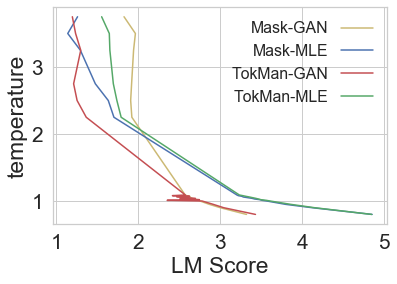

In [59]:
size=15
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
idx = 0

ax.plot(maskgan_lm[idx], TEMPERATURES, 'y', alpha=1.0, label='Mask-GAN')
ax.plot(maskmle_lm[idx], TEMPERATURES, 'b', alpha=1.0, label='Mask-MLE')
ax.plot(tokmangan_lm[idx], TEMPERATURES, 'r', alpha=1.0, label='TokMan-GAN')
ax.plot(tokmanmle_lm[idx], TEMPERATURES, 'g', alpha=1.0, label='TokMan-MLE')

ax.set_xlabel('LM Score')
ax.set_ylabel('temperature')

plt.legend(markerfirst=False, frameon=False, fontsize='x-small')
plt.show()

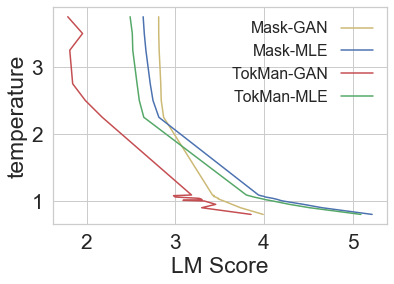

In [61]:
size=15
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
idx = 1

ax.plot(maskgan_lm[idx], TEMPERATURES, 'y', alpha=1.0, label='Mask-GAN')
ax.plot(maskmle_lm[idx], TEMPERATURES, 'b', alpha=1.0, label='Mask-MLE')
ax.plot(tokmangan_lm[idx], TEMPERATURES, 'r', alpha=1.0, label='TokMan-GAN')
ax.plot(tokmanmle_lm[idx], TEMPERATURES, 'g', alpha=1.0, label='TokMan-MLE')

ax.set_xlabel('LM Score')
ax.set_ylabel('temperature')

plt.legend(markerfirst=False, frameon=False, fontsize='x-small')
plt.show()

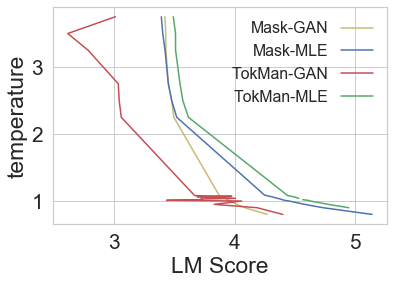

In [62]:
size=15
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
idx = 2

ax.plot(maskgan_lm[idx], TEMPERATURES, 'y', alpha=1.0, label='Mask-GAN')
ax.plot(maskmle_lm[idx], TEMPERATURES, 'b', alpha=1.0, label='Mask-MLE')
ax.plot(tokmangan_lm[idx], TEMPERATURES, 'r', alpha=1.0, label='TokMan-GAN')
ax.plot(tokmanmle_lm[idx], TEMPERATURES, 'g', alpha=1.0, label='TokMan-MLE')

ax.set_xlabel('LM Score')
ax.set_ylabel('temperature')

plt.legend(markerfirst=False, frameon=False, fontsize='x-small')
plt.show()

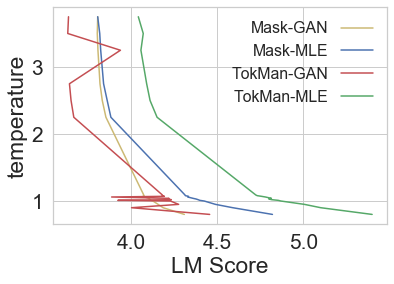

In [63]:
size=15
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
idx = 3

ax.plot(maskgan_lm[idx], TEMPERATURES, 'y', alpha=1.0, label='Mask-GAN')
ax.plot(maskmle_lm[idx], TEMPERATURES, 'b', alpha=1.0, label='Mask-MLE')
ax.plot(tokmangan_lm[idx], TEMPERATURES, 'r', alpha=1.0, label='TokMan-GAN')
ax.plot(tokmanmle_lm[idx], TEMPERATURES, 'g', alpha=1.0, label='TokMan-MLE')

ax.set_xlabel('LM Score')
ax.set_ylabel('temperature')

plt.legend(markerfirst=False, frameon=False, fontsize='x-small')
plt.show()